In [25]:
# Load necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import joblib
import numpy as np



In [2]:
# Load the engineered dataset
df= pd.read_csv("C:/Users/USER/My notebook/DataSciencePro/loan-default-analysis/data/engineered_dataset/featured_data.csv")
print(df.shape)
df.info()

(27346, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27346 entries, 0 to 27345
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 27346 non-null  object 
 1   birthdate                  27346 non-null  object 
 2   bank_account_type          27346 non-null  object 
 3   longitude_gps              27346 non-null  float64
 4   latitude_gps               27346 non-null  float64
 5   bank_name_clients          27346 non-null  object 
 6   employment_status_clients  27346 non-null  object 
 7   systemloanid               27346 non-null  float64
 8   loannumber                 27346 non-null  float64
 9   loanamount                 27346 non-null  float64
 10  totaldue                   27346 non-null  float64
 11  termdays                   27346 non-null  float64
 12  approveddate               27346 non-null  object 
 13  creationdate               27346 n

In [6]:
# Multiple Linear Regression
# Target: totaldue
# Features: loanamount, charges, loan_duration

X = df[["loanamount", "charges_pct", "loan_duration"]]
y = df["totaldue"]


In [13]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
X.head()

,loanamount,charges_pct,loan_duration
0,30000.0,7.5,15
1,20000.0,22.5,28
2,10000.0,30.0,8
3,10000.0,30.0,25
4,10000.0,15.0,25


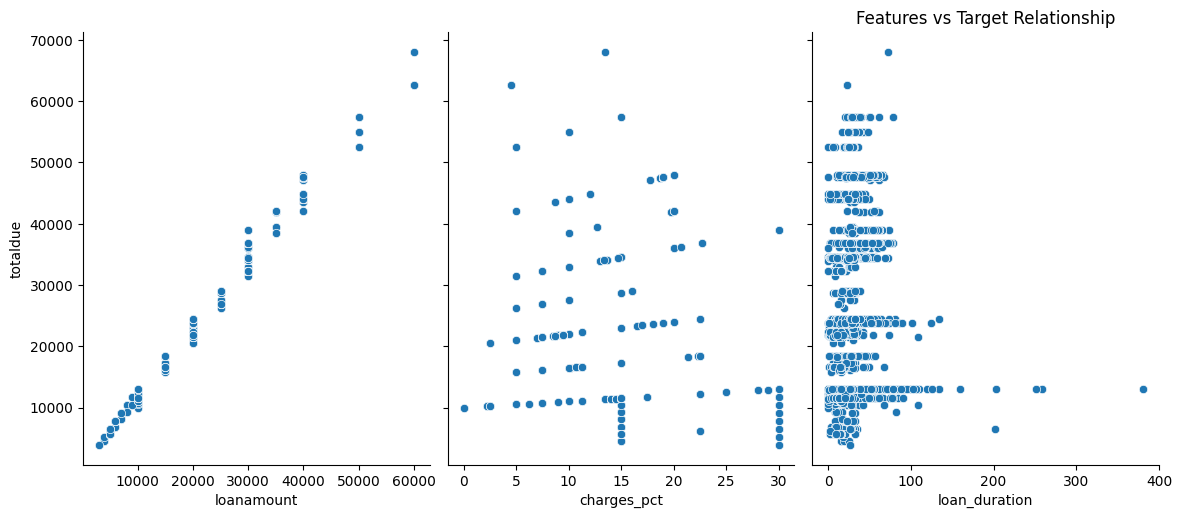

In [17]:
# Visualise the relationship between features and target
sns.pairplot(df, x_vars=['loanamount', 'charges_pct', 'loan_duration'], y_vars='totaldue', height=5, aspect=0.8, kind='scatter')
plt.title("Features vs Target Relationship")
plt.show()

In [18]:
# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [21]:
# Print model coefficients and evaluation metrics
print("Coefficients:")
print(f"  loanamount: {model.coef_[0]}")
print(f"  charges_pct: {model.coef_[1]}")
print(f"  loan_duration: {model.coef_[2]}")
print("Intercept:", model.intercept_)
print("R^2 Score:", r2_score(y_test, y_pred))

Coefficients:
  loanamount: 1.153033579754812
  charges_pct: 121.95585148692913
  loan_duration: 7.7406970882167485
Intercept: -2123.156316809589
R^2 Score: 0.9973806360199639


This multiple regression model performs excellently with an R² of 0.995, explaining 99.5% of the variance in total due amounts.
Coefficient interpretation:

Feature 1 (loan amount): For every $1 increase in loan amount, total due increases by $1.02 - representing principal plus interest/fees
Feature 2 (term days): Each additional day adds $111.62 to total due - likely reflecting daily interest accrual or longer-term fees
Feature 3 (loan number): Each subsequent loan reduces total due by $43.60 - possibly indicating customer loyalty discounts or improved terms for repeat borrowers

The intercept of $107.61 represents base processing fees. The model shows strong predictive power and reveals interesting business insights about pricing structure and customer incentives.

All in alignments with y = mx + b

In [23]:
# Save my model
joblib.dump(model, 'multiple_linear_regression_model.pkl')
print("Model saved successfully!")

Model saved successfully!


In [26]:
# Test prediction with new data
new_data = np.array([[5000, 10, 30]])  # [loanamount, charges_pct, loan_duration]
prediction = model.predict(new_data)
print(f"Predicted totaldue: {prediction[0]}")

Predicted totaldue: 5093.791009480265


c:\Users\USER\anaconda3\envs\olayinka\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
